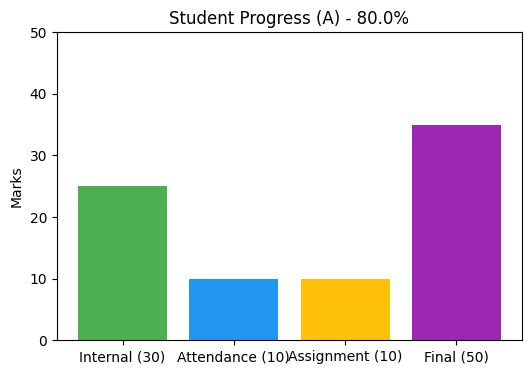

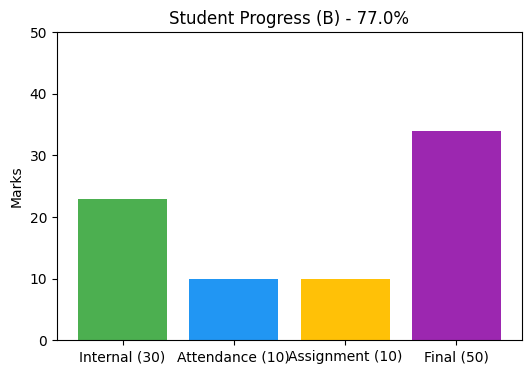

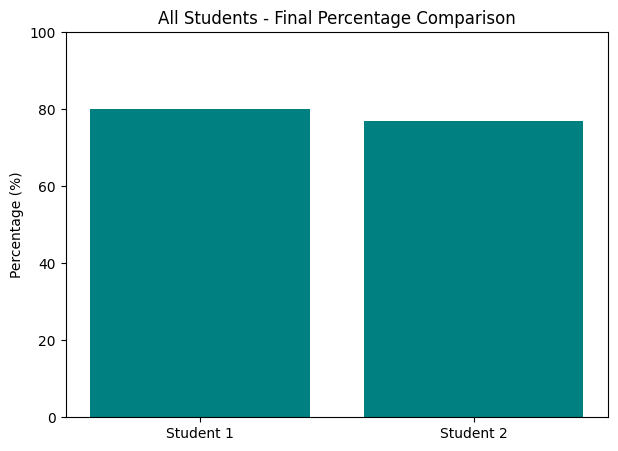

In [1]:
import tkinter as tk
from tkinter import messagebox, ttk
import matplotlib.pyplot as plt
import pandas as pd

students_data = []  


def predict_grade():
    try:
        internal = float(entry_internal.get())
        attendance = float(entry_attendance.get())
        assignment = float(entry_assignment.get())
        final_marks = float(entry_final.get())
        
       
        if internal > 30 or attendance > 10 or assignment > 10 or final_marks > 50:
            messagebox.showerror("Error", "Please enter marks within valid limits.")
            return
        
        total = internal + attendance + assignment + final_marks
        percentage = (total / 100) * 100
        
       
        if percentage >= 90:
            grade = "A+"
        elif percentage >= 80:
            grade = "A"
        elif percentage >= 70:
            grade = "B"
        elif percentage >= 60:
            grade = "C"
        elif percentage >= 50:
            grade = "D"
        else:
            grade = "Fail"
        
       
        student = {
            "Internal": internal,
            "Attendance": attendance,
            "Assignment": assignment,
            "Final": final_marks,
            "Total": total,
            "Percentage": round(percentage, 2),
            "Grade": grade
        }
        students_data.append(student)
        
        
        update_table()
        
        messagebox.showinfo("Data Saved", "Student data added successfully!")
        plot_student_graph(student)
        
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values.")


def update_table():
    for i in table.get_children():
        table.delete(i)
    for idx, s in enumerate(students_data, start=1):
        table.insert("", "end", values=(idx, s["Internal"], s["Attendance"], s["Assignment"],
                                        s["Final"], s["Total"], s["Percentage"], s["Grade"]))


def plot_student_graph(student):
    categories = ['Internal (30)', 'Attendance (10)', 'Assignment (10)', 'Final (50)']
    marks = [student["Internal"], student["Attendance"], student["Assignment"], student["Final"]]
    
    plt.figure(figsize=(6,4))
    plt.bar(categories, marks, color=['#4CAF50', '#2196F3', '#FFC107', '#9C27B0'])
    plt.title(f"Student Progress ({student['Grade']}) - {student['Percentage']}%")
    plt.ylabel("Marks")
    plt.ylim(0, 50)
    plt.show()


def add_another_student():
    entry_internal.delete(0, tk.END)
    entry_attendance.delete(0, tk.END)
    entry_assignment.delete(0, tk.END)
    entry_final.delete(0, tk.END)


def exit_program():
    if len(students_data) == 0:
        messagebox.showinfo("Exit", "No data to display. Exiting program.")
        root.destroy()
        return
    
    df = pd.DataFrame(students_data)
    df.index += 1
    
   
    plt.figure(figsize=(7,5))
    student_names = [f"Student {i}" for i in range(1, len(students_data)+1)]
    percentages = [s["Percentage"] for s in students_data]
    
    plt.bar(student_names, percentages, color='teal')
    plt.title("All Students - Final Percentage Comparison")
    plt.ylabel("Percentage (%)")
    plt.ylim(0, 100)
    plt.show()
    
    root.destroy()



root = tk.Tk()
root.title("Student Grade Prediction System")
root.geometry("850x580")
root.configure(bg="#E8F0FE")

tk.Label(root, text="🎓 Student Grade Prediction System", 
         font=("Arial", 16, "bold"), bg="#E8F0FE").pack(pady=10)


frame_input = tk.Frame(root, bg="#E8F0FE")
frame_input.pack(pady=5)

tk.Label(frame_input, text="Internal Marks (out of 30):", bg="#E8F0FE").grid(row=0, column=0, sticky="e")
entry_internal = tk.Entry(frame_input, width=10)
entry_internal.grid(row=0, column=1, padx=10)

tk.Label(frame_input, text="Attendance Marks (out of 10):", bg="#E8F0FE").grid(row=0, column=2, sticky="e")
entry_attendance = tk.Entry(frame_input, width=10)
entry_attendance.grid(row=0, column=3, padx=10)

tk.Label(frame_input, text="Assignment Marks (out of 10):", bg="#E8F0FE").grid(row=1, column=0, sticky="e")
entry_assignment = tk.Entry(frame_input, width=10)
entry_assignment.grid(row=1, column=1, padx=10)

tk.Label(frame_input, text="Final Exam Marks (out of 50):", bg="#E8F0FE").grid(row=1, column=2, sticky="e")
entry_final = tk.Entry(frame_input, width=10)
entry_final.grid(row=1, column=3, padx=10)



frame_buttons = tk.Frame(root, bg="#E8F0FE")
frame_buttons.pack(pady=10)

tk.Button(frame_buttons, text="Predict & Save", command=predict_grade, bg="#4CAF50", 
          fg="white", font=("Arial", 11, "bold"), width=15).grid(row=0, column=0, padx=10)

tk.Button(frame_buttons, text="Add Another", command=add_another_student, bg="#2196F3", 
          fg="white", font=("Arial", 11, "bold"), width=15).grid(row=0, column=1, padx=10)

tk.Button(frame_buttons, text="Exit & Show All", command=exit_program, bg="#f44336", 
          fg="white", font=("Arial", 11, "bold"), width=15).grid(row=0, column=2, padx=10)


columns = ("No", "Internal", "Attendance", "Assignment", "Final", "Total", "Percentage", "Grade")
table = ttk.Treeview(root, columns=columns, show="headings", height=8)

for col in columns:
    table.heading(col, text=col)
    table.column(col, width=100, anchor="center")

table.pack(pady=15)

root.mainloop()
